<a href="https://colab.research.google.com/github/minjeon99/ESAA/blob/Week3/w3_mon_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02. 사이킷런으로 시작하는 머신러닝**

## **01. 사이킷런 소개와 특징**
- **사이킷런(scikit-learn)**: 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
- **특징**
  - 쉽고 가장 파이썬스러운 API
  - 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API
  - 오랜 기간 실전 환경에서 검증, 매우 많은 환경에서 사용되는 성숙한 라이브러리

In [ ]:
import sklearn

print(sklearn.__version__)

1.2.2


## **02. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기**
- 붓꽃 데이터 세트: 꽃잎의 길이/너비, 꽃받침의 길이/너비 피처(Feature)를 기반으로 꽃의 품종을 분류(Classificaiton)
- **분류**: 대표적인 지도학습(Supervised Learning) 방법의 하나
- **지도학습**: 학습을 위한 다양한 피처와 결정값인 레이블(Label) 데이터로 모델 학습 -> 별도의 테스트 데이터에서 미지의 레이블 예측 => 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
- 학습을 위해 주어진 데이터 세트 = 학습 데이터 세트,

  머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트 = 테스트 데이터 세트

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가짐
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가짐
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 피처: sepal length, sepat width, petal length, petal width
- 레이블(Label, 결정값): 0,1,2
  - 0: Setosa
  - 1: versicolor
  - 2: virginica

- 학습용/테스트용 데이터 분리
  - 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요
- `train_test_split`: 입력값의 비율로 학습/테스트 데이터 분할

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

- **iris_data**: 피처 데이터 세트
- **iris_label**: 레이블(Label)데이터 세트
- **y_train**: 학습용 레이블 데이터 세트
- **y_test**: 테스트용 레이블 데이터 세트
- **DecisionTreeClassifier**: 사이킷런의 의사 결정 트리 클래스

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

- 예측은 반드시 학습 데이터가 아닌 다른 데이터 이용 - 일반적으로 테스트 데이터 세트 이용
- `predict()`: 테스트용 피처 데이터 세트를 입력해 호출 -> 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값 반환

In [ ]:
# 학습 완료된 DecisionTreeClassifier 객체에서 테스트 데이터로 예측 수행
pred = dt_clf.predict(X_test)

- 예측 성능 평가 - 여러 가지가 있으나 여기서는 정확도 측정
- **정확도**: 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지 평가
- `accuracy_score()`: 정확도 측정을 위한 사이킷런 함수
  - 첫 번째 파라미터: 실제 레이블 데이터 세트
  - 두 번째 파라미터: 예측 레이블 데이터 세트

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


**붓꽃 데이터 세트로 분류 예측한 프로세스**
1. **데이터 세트 분리**: 데이터를 학습 데이터와 테스트 데이터로 분리
2. **모델 학습**: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습
3. **예측 수행**: 학습된 ML 모델을 이용해 테스트 데이터의 분류(=붓꽃 종류) 예측
4. **평가**: 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능 평가

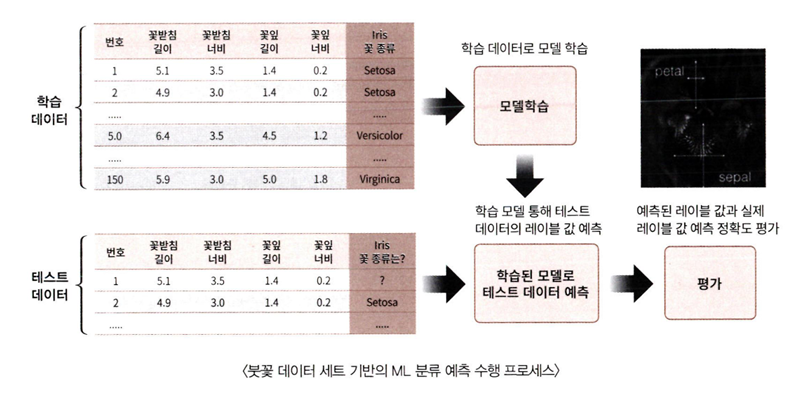

## **03. 사이킷런의 기반 프레임워크 익히기**

### **Estimator 이해 및 fit(), predict() 메서드**
- 사이킷런은 ML 모델 학습을 위한 `fit()`, 학습된 모델을 예측을 위한 `predict()` 메서드 제공
- **분류** 알고리즘 구현 클래스: `Classifier`
- **회귀** 알고리즘 구현 클래스: `Regressor`
- `Estimator` 클래스: Classifier + Regressor -> 지도학습의 모든 알고리즘을 구현한 클래스를 통칭
  - `cross_val_score()`와 같은 evaluation 함수, `GridSearchCV와` 같은 하이퍼 파라미터 튜닝 지원 클래스
  
    : Estimator를 인자로 받음 -> `fit()`, `predict()`를 호출해서 평가 / 하이퍼 파라미터 튜닝 수행
- 비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스 역시 대부분 `fit()`, `transform()` 적용
  - `fit()`: 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조 맞추는 작업 (지도학습의 `fit()`과 같이 학습을 의미하는 것이 X)
  - `transform()`: 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업 수행
  - `fit_transform()`: `fit()`과 `transform()`을 하나로 결합

### **사이킷런의 주요 모듈**
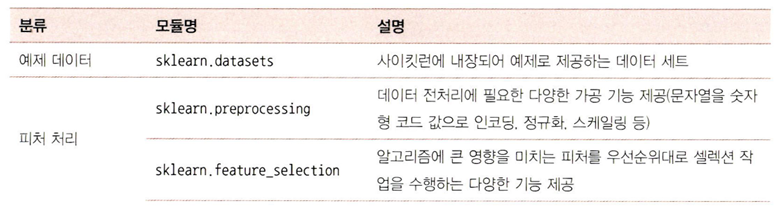

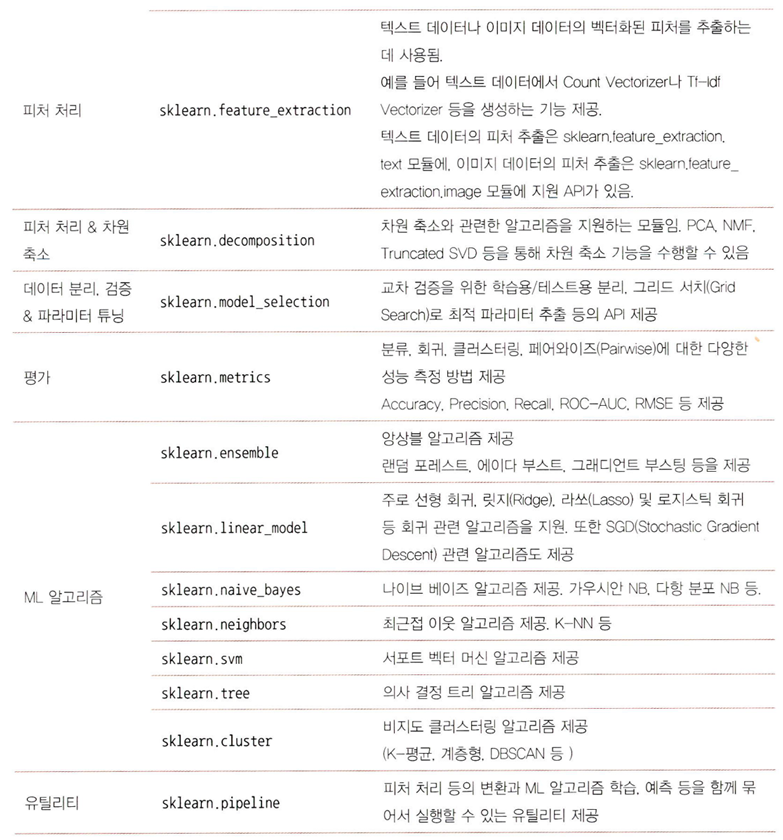

**머신러닝 모델 구축의 주요 프로세스**
- 피처 처리(feature processing): 피처 가공, 변경, 추출 수행
- ML 알고리즘 학습/예측
- 모델 평가

-> 세 단계를 반복적으로 수행

### **내장된 예제 데이터 세트**
- 사이킷런에는 예제로 활용할 수 있는 데이터 세트 내장 -> datasets 모듈에 있는 여러 API 호출해 만들기
  - 분류/회귀 연습을 위한 예제용도의 데이터 세트
    - 딕셔너리 형태
      - **data**(ndarray): 피처의 데이터 세트
      - **target**(ndarray): 분류 -> 레이블 값, 회귀 -> 숫자 결괏값 데이터 세트
      - **target_names**(ndarray/list): 개별 레이블 이름
      - **feature_names**(ndarray/list): 피처 이름
      - **DESCR**(string): 데이터 세트와 각명

    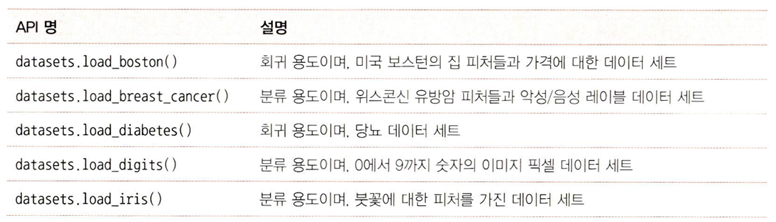
  - 분류/클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트
- fetch 계열 명령: 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data 서브 디렉터리에 저장한 후 불러들이는 데이터

  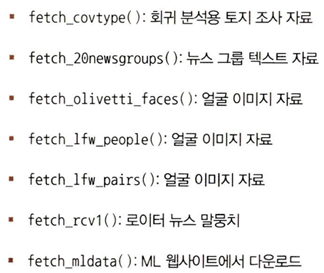
- 분류와 크러스터링을 위한 표본 데이터 생성기
  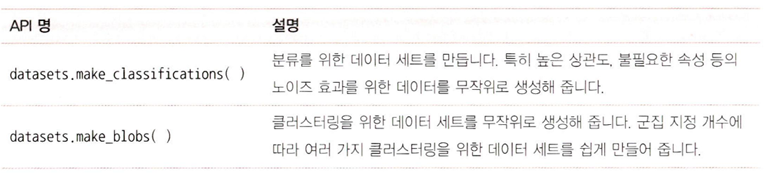

- 피처의 데이터 값 반환받기 위해서는 내장 데이터 세트 API 호출 -> Key값 지정

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


- `Bunch` 클래스: 파이썬 딕셔너리 자료형과 유사

In [ ]:
# load_iris() 데이터 세트의 key 값 확인
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


- 데이터 키: 피처들의 데이터 값
- 피처 데이터 값 추출: `데이터 세트.data`(= `데이터 세트['data']`) - target, feature_names, DESCR key 값도 동일
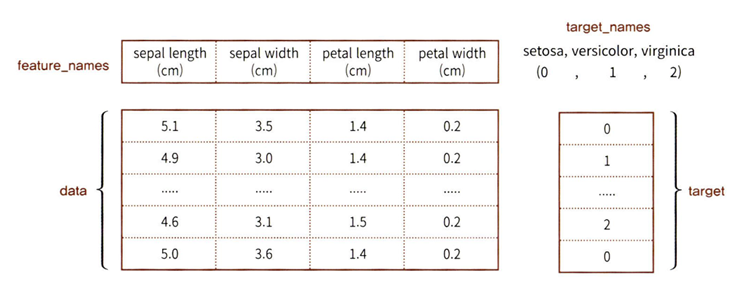

In [ ]:
# feature_names, target_name, data, target이 가리키는 값 출력
print('\n feature_names의 type:', type(iris_data.feature_names))
print(' feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print(' target_names shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print(' data의 shape:', iris_data.data.shape)
print(iris_data.data)

print('\n target의 type:', type(iris_data.target))
print(' target의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names의 type: <class 'list'>
 feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
 target_names shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
 data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.

## **04. Model Selection 모듈 소개**
- `model_selection`: 학습/테스트 데이터 세트 분리, 교차 검증 분할/평가, Estimator의 하이퍼 파라미터 튜닝을 위한 다양한 함수/클래스 제공

### **학습/테스트 데이터 세트 분리 - train_test_split()**

In [ ]:
# 학습 데이터 세트로만 학습 -> 예측 시 문제
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


- 정확도 = 100%
  - 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문

  => 예측 수행하는 데이터 세트는 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 함
- `train_test_split()`: 원본 데이터 세트에서 학습 및 테스트 데이터 세트 분리
  - 첫 번째 파라미터: 피처 데이터 세트
  - 두 번째 파라미터: 레이블 데이터 세트
  - 선택 파라미터
    - `test_size`: 전체 데이터 중 테스트 데이터 세트의 크기(default=0.25)
    - `train_size`: 전체 데이터 중 학습용 데이터 세트의 크기 - 통상적으로 test_size 파라미터를 사용
    - `shuffle`: 데이터 분리하기 전 미리 데이터 섞을지 결정(default=True) - 데이터 분산시켜 효율적인 학습/테스트 데이터 세트 만드는 데 사용
    - random_state: 호출할 때마다 동일한 학습/테스트 데이터 세트 생성하기 위해 주어지는 난수 값
  - **반환값**: 튜플 형태
    
    (학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

In [ ]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


- 학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만
- 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능 평가하는 것도 중요

### **교차 검증**
- 알고리즘 학습을 위한 학습 데이터와 예측 성능 평가를 위한 별도의 테스트용 데이터
  - 이 방법 역시 과적합(Overfitting)에 취약한 약점을 가질 수 있음
  - 고정된 학습 데이터와 테스트 데이터로 평가하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생김
  - 결국 다른 테스트용 데이터가 들어올 경우 성능 저하
- **과적합**: 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 것
- **교차 검증**: 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가 수행
  - 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등 모델 최적화 편리하게 수행 가능

**ML 모델의 성능 평가**
- 교차 검증 기반으로 1차 평가 -> 테스트 데이터 세트에 적용해 평가
- ML에 사용되는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 분리
  - 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용

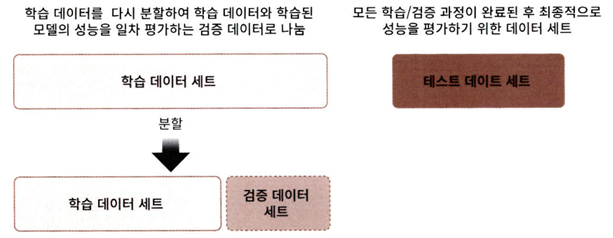

#### **K 폴드 교차 검증**
- K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복 수행
- 5 폴드 교차 검증 예시(K=5)
  1. 데이터 세트를 K등분(5등분)
  2. 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가 수행

    e.g. 첫 번째 반복에서는 마지막 5번째 등분을 검증 데이터 세트로 설정 -> 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가 수행
  3. 5개 평가를 평균한 결과를 가지고 예측 성능 평가

  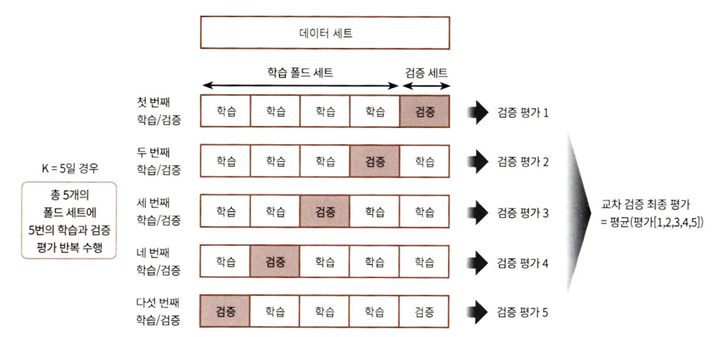

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


- `KFold(n_splits=5)`: KFold 객체 생성
- `split()`: 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리
  - 학습용/검증용 데이터로 분할할 수 있는 인덱스 반환
  - 실제로 학습용/검증용 데이터 추출은 반환된 인덱스를 기반으로 개발 코드에서 직접 수행

In [ ]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


#### **Stratified K 폴드**
- 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
  - **불균형한 분포도**를 가진 레이블 데이터 집합: 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것
- K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제 해결
- Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

***e.g. 대출 사기 데이터 예측***
- 데이터 세트: 1억 건
- 전체의 0.0001%의 아주 작은 확률로 대출 사기 레이블 존재

    -> K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값인 0, 1 비율을 제대로 반영 X

    -> 원본 데이터와 유사한 대출 사기 레이블 값의 분포를 학습/테스트 세트에도 유지하는 게 매우 중요

In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


- 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출
  - 첫 번째 교차 검증: 학습 레이블의 1, 2 값이 각각 50개 추출, 검증 레이블 0 값이 50개 추출

    => 학습 모델은 절대 0을 예측 X -> 검증 예측 정확도가 0
  - StratifiedKFold는 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제 해결
- `split()` 메서드 인자: 피처 데이터 세트 + **레이블 데이터 세트**

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


- 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도:  0.9666666666666667


- 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야 함
- 일반적으로 분류에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할돼야 함
- 회귀에서는 Stratified K 폴드가 지원되지 X - 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문

#### **교차 검증을 보다 간편하게 - cross_val_score()**
- `cross_val_score()`: 교차 검증을 편리하게 수행할 수 있게 해주는 API
  1. 폴드 세트를 설정
  2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
  3. 반복적으로 학습과 예측 수행하고 예측 성능 반환
- **파라미터**
  - `estimator`: Classifier, Regressor
  - `X`: 피처 데이터 세트
  - `y`: 레이블 데이터 세트
  - `scoring`: 예측 성능 평가 지표 기술
  - `cv`: 교차 검증 폴드 수
- **반환값**: scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환
- **cross_val_score()**: classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트 분할

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환 -> (일반적으로) 평균해 평가 수치로 사용
- `cross_val_score()`: 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation)
- `cross_validat3()`: 여러 개의 평가 지표를 반환, 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공

### **GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**
- **하이퍼 파라미터**: 머신러닝 알고리즘을 구성하는 주요 구성 요소, 이 값을 조정해 알고리즘의 예측 성능 개선
- `GridSearchCV`: Classifier, Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력

  -> 최적의 파라미터 도출할 수 있는 방안 제공

In [ ]:
grid_parameters = {'max_depth':[1,2,3],
                   'min_samples_split':[2,3]
                   }

**주요 파라미터**
- `estimator`: classifier, regressor, pipeline
- `param_grid`: key + 리스트 값을 가지는 딕셔너리. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정
- `scoring`: 예측 성능을 측정할 평가 방법
- `cv`: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수
- `refit`(dafalut=True): True -> 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [ ]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
# refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


**주요 칼럼별 의미**
- params: 수행할 때마다 적용된 개별 하이퍼 파라미터값 나타냄
- rank_test_score: 하이퍼 파라미터별로 성능이 좋은 score 순위 - 1이 가장 뛰어난 순위(=최적의 하이퍼 파라미터)
- mean_test_score: 개별 하이퍼 파라미터별로 CV 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

In [ ]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667
